In [ ]:
#Нейро-нечеткие системы
#Лабораторная работа №5

#Задача: классификация текстов

In [557]:
#мешок слов

%matplotlib inline
import os

from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
#import seaborn as sns
## for processing
import re
from sklearn.model_selection import train_test_split
import sklearn.feature_selection 
import nltk
#перед использованием раскомментировать
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanchernov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ivanchernov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [558]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python import keras
from tensorflow.keras import layers,Sequential, Model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import models

In [559]:
##!pip install gensim==3.4.0
##!pip install smart_open==1.9.0
# import gensim

In [754]:
#оригинальный датасет
# fake_or_real_news.csv https://www.kaggle.com/hassanamin/textdb3 [label title] 0.92
# artikel_alwi.csv 1.0
# apple-twitter-sentiment-texts.csv https://www.kaggle.com/seriousran/appletwittersentimenttexts?select=apple-twitter-sentiment-texts.csv
# FinalBalancedDataset.csv 0.94 позитивные и негативные твиты
# medium_post_titles.csv 0.70 и раскомментировать
df = pd.read_csv("FinalBalancedDataset.csv", delimiter=",")
# только для medium_post_titles
# df = df.drop(df.loc[df['category'] == 'android-development'].index)
# df = df.drop(df.loc[df['category'] == 'product-management'].index)
# df = df.drop(df.loc[df['category'] == 'ios-development'].index)
# df = df.drop(df.loc[df['category'] == 'venture-capital'].index)
# df = df.drop(df.loc[df['category'] == 'self-driving-cars'].index)
# df = df.drop(df.loc[df['category'] == 'privacy'].index)
# # df = df.drop(df.loc[df['category'] == 'psychology'].index)
# df = df.drop(df.loc[df['category'] == 'medium-magazine'].index)
# df = df.drop(df.loc[df['category'] == 'true-crime'].index)
# df = df.drop(df.loc[df['category'] == 'psychedelics'].index)
# df = df.drop(df.loc[df['category'] == 'san-francisco'].index)
# df = df.drop(df.loc[df['category'] == 'race'].index)
# df = df.drop(df.loc[df['category'] == 'language'].index)
# df = df.drop(df.loc[df['category'] == 'transportation'].index)
# df = df.drop(df.loc[df['category'] == 'podcasts'].index)
# df = df.drop(df.loc[df['category'] == 'basic-income'].index)
# df = df.drop(df.loc[df['category'] == 'gun-control'].index)
# df = df.drop(df.loc[df['category'] == 'accessibility'].index)
# df = df.drop(df.loc[df['category'] == 'style'].index)
# df = df.drop(df.loc[df['category'] == 'beauty'].index)
# df = df.drop(df.loc[df['category'] == 'election-2020'].index)
# df = df.drop(df.loc[df['category'] == 'neuroscience'].index)
# df = df.drop(df.loc[df['category'] == 'space'].index)
# df = df.drop(df.loc[df['category'] == 'freelancing'].index)
# df = df.drop(df.loc[df['category'] == 'tv'].index)
# df = df.drop(df.loc[df['category'] == 'addiction'].index)
# df = df.drop(df.loc[df['category'] == 'immigration'].index)
# df = df.drop(df.loc[df['category'] == 'digital-life'].index)
# df = df.drop(df.loc[df['category'] == 'disability'].index)
# df = df.drop(df.loc[df['category'] == 'lgbtqia'].index)
# df = df.drop(df.loc[df['category'] == 'future'].index)
# df = df.drop(df.loc[df['category'] == 'women'].index)
# df = df.drop(df.loc[df['category'] == 'religion'].index)
# df = df.drop(df.loc[df['category'] == 'pets'].index)
# df = df.drop(df.loc[df['category'] == 'justice'].index)
# df = df.drop(df.loc[df['category'] == 'mindfulness'].index)
# df = df.drop(df.loc[df['category'] == 'gadgets'].index)
# df = df.drop(df.loc[df['category'] == 'cities'].index)
# df = df.drop(df.loc[df['category'] == 'math'].index)
# df = df.drop(df.loc[df['category'] == 'ux'].index)
# df = df.drop(df.loc[df['category'] == 'creativity'].index)
# df = df.drop(df.loc[df['category'] == 'productivity'].index)
# df = df.drop(df.loc[df['category'] == 'photography'].index)
# df = df.drop(df.loc[df['category'] == 'comics'].index)
# df = df.drop(df.loc[df['category'] == 'sexuality'].index)
# df = df.drop(df.loc[df['category'] == 'money'].index)
# df = df.drop(df.loc[df['category'] == 'books'].index)
# df = df.drop(df.loc[df['category'] == 'programming'].index)
# df = df.drop(df.loc[df['category'] == 'media'].index)
# df = df.drop(df.loc[df['category'] == 'spirituality'].index)
# df = df.drop(df.loc[df['category'] == 'gaming'].index)
# df = df.drop(df.loc[df['category'] == 'art'].index)
# df = df.drop(df.loc[df['category'] == 'philosophy'].index)
# df = df.drop(df.loc[df['category'] == 'design'].index)
# df = df.drop(df.loc[df['category'] == 'blockchain'].index)
# df = df.drop(df.loc[df['category'] == 'psychology'].index)
# df = df.drop(df.loc[df['category'] == 'culture'].index)
# df = df.drop(df.loc[df['category'] == 'equality'].index)
# df = df.drop(df.loc[df['category'] == 'work'].index)
# df = df.drop(df.loc[df['category'] == 'politics'].index)
# df = df.drop(df.loc[df['category'] == 'writing'].index)
# df = df.drop(df.loc[df['category'] == 'business'].index)
# df = df.drop(df.loc[df['category'] == 'javascript'].index)
# df = df.drop(df.loc[df['category'] == 'cybersecurity'].index)
# df = df.drop(df.loc[df['category'] == 'parenting'].index)
# df = df.drop(df.loc[df['category'] == 'visual-design'].index)
# df = df.drop(df.loc[df['category'] == 'humor'].index)
# df = df.drop(df.loc[df['category'] == 'history'].index)
# df = df.drop(df.loc[df['category'] == 'data-science'].index)
# df = df.drop(df.loc[df['category'] == 'world'].index)
# df = df.drop(df.loc[df['category'] == 'poetry'].index)
# df = df.drop(df.loc[df['category'] == 'lifestyle'].index)
# df = df.drop(df.loc[df['category'] == 'fiction'].index)
# df = df.drop(df.loc[df['category'] == 'food'].index)
# df = df.drop(df.loc[df['category'] == 'education'].index)
# df = df.drop(df.loc[df['category'] == 'film'].index)
# df = df.drop(df.loc[df['category'] == 'sports'].index)
# df = df.drop(df.loc[df['category'] == 'startups'].index)
# df = df.drop(df.loc[df['category'] == 'music'].index)
# df = df.drop(df.loc[df['category'] == 'cryptocurrency'].index)
# df = df.drop(df.loc[df['category'] == 'marketing'].index)
# df = df.drop(df.loc[df['category'] == 'travel'].index)
# df = df.drop(df.loc[df['category'] == 'machine-learning'].index)
# df = df.drop(df.loc[df['category'] == 'mental-health'].index)
# df = df.drop(df.loc[df['category'] == 'environment'].index)
# df = df.drop(df.loc[df['category'] == 'technology'].index)
# df = df.drop(df.loc[df['category'] == 'science'].index)
# df = df.drop(df.loc[df['category'] == 'software-engineering'].index)
# df = df.drop(df.loc[df['category'] == 'artificial-intelligence'].index)
# df = df.select_dtypes(include=['number'])
df = df.fillna('h')
df.head(10)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
5,5,0,[2/2] huge fan fare and big talking before the...
6,6,0,@user camping tomorrow @user @user @user @use...
7,7,0,the next school year is the year for exams.ð...
8,8,0,we won!!! love the land!!! #allin #cavs #champ...
9,9,0,@user @user welcome here ! i'm it's so #gr...


In [755]:
# #оригинальный датасет
# df = pd.read_csv("./datasets/" + fileselect.value, delimiter=",")
# df.head(10)

In [756]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('Unnamed: 0', 'Toxicity', 'tweet'), value='Unnamed: 0')

In [757]:
#выбрать столбец, который будет отвечать за текст
xselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
xselect

Select(description='Select file:', options=('Unnamed: 0', 'Toxicity', 'tweet'), value='Unnamed: 0')

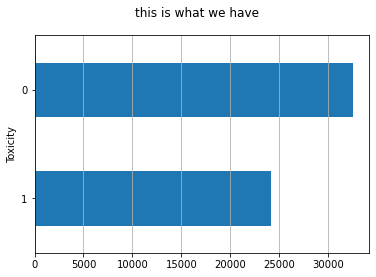

In [758]:
#просто смотрим какие у нас есть лейблы
fig, ax = plt.subplots()
fig.suptitle("this is what we have", fontsize=12)
df[yselect.value].reset_index().groupby(yselect.value).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [759]:
x = df[xselect.value].copy()
y = df[yselect.value].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.1)

In [760]:
from tensorflow.keras.preprocessing import text, sequence
#здесь тот же Bag of Words
max_words = 2000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [761]:
tokenize.fit_on_texts(x_train) 
x_train = tokenize.texts_to_matrix(x_train)
x_test = tokenize.texts_to_matrix(x_test)

In [762]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [763]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [764]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [765]:
from tensorflow.keras import utils
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [766]:
batch_size = 32
epochs = 20

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 512)               1024512   
_________________________________________________________________
activation_229 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_161 (Dense)            (None, 2)                 1026      
_________________________________________________________________
activation_230 (Activation)  (None, 2)                 0         
Total params: 1,025,538
Trainable params: 1,025,538
Non-trainable params: 0
_________________________________________________________________


In [767]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, validation_split=0.1)

Epoch 1/20
1437/1437 [==============================] - 6s 4ms/step - loss: 0.2686 - accuracy: 0.9024 - val_loss: 0.1698 - val_accuracy: 0.9338
Epoch 2/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.1336 - accuracy: 0.9475 - val_loss: 0.1695 - val_accuracy: 0.9338
Epoch 3/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.0927 - accuracy: 0.9669 - val_loss: 0.1845 - val_accuracy: 0.9334
Epoch 4/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.2192 - val_accuracy: 0.9332
Epoch 5/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.2505 - val_accuracy: 0.9354
Epoch 6/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.2905 - val_accuracy: 0.9350
Epoch 7/20
1437/1437 [==============================] - 5s 4ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.3068 - val_accuracy:

In [768]:
score = model.evaluate(x_test, y_test) # x_test y_test
print('Test accuracy:', score[1])


178/178 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.9424
Test accuracy: 0.9423788785934448
